### Load the necessary packages

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer #For KNN Imputation
from sklearn.preprocessing import LabelEncoder

### Loading the dataframe

In [78]:
df = pd.read_csv("heart.csv")

### Head of the dataframe

In [79]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Basic information about the dataframe

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Number of rows and columns in the dataframe

In [81]:
df.shape

(918, 12)

### Mean, Median and other descriptive fratures of the continuous variables -

In [82]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Observation** - The minimum value of *RestingBP* and *Cholesterol* is **0**. From domain knowledge, this is not possible and there might errors or missing values in the dataframe

As we observed, the missing values in the dataframe are in form of **0**. So lets plot the frequency graph of RestingBP and Cholesterol -

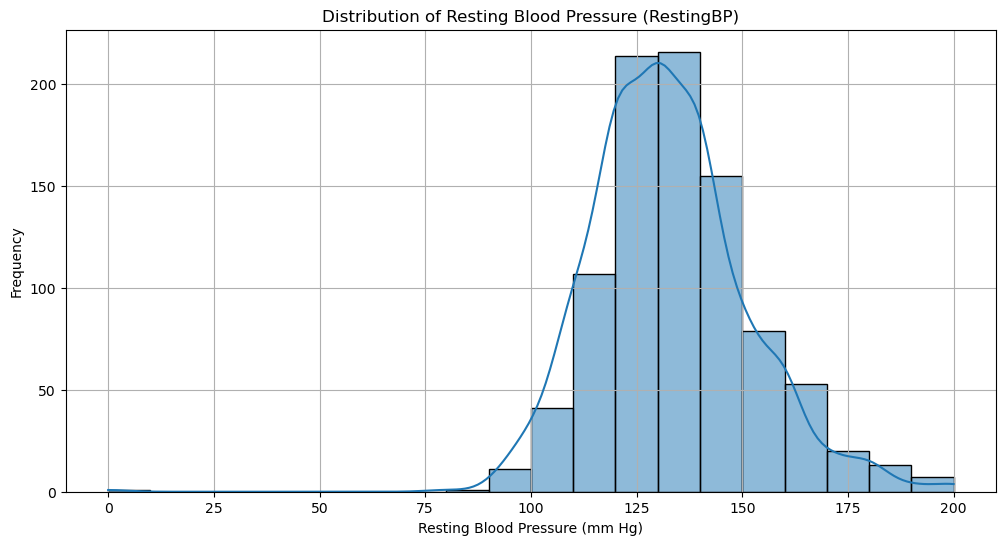

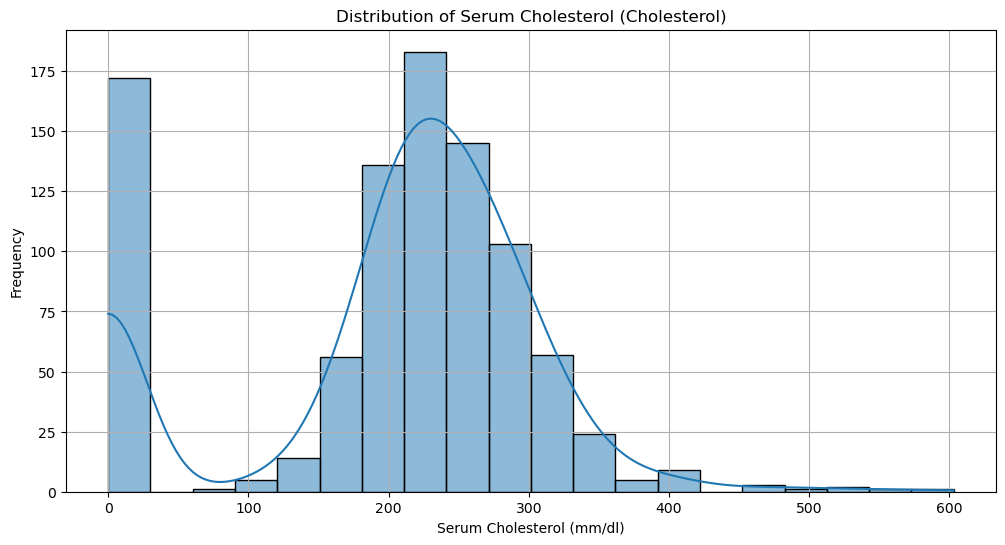

In [83]:
# Plotting RestingBP
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='RestingBP', bins=20, kde=True)  # You can use sns.histplot for a better distribution plot
plt.title('Distribution of Resting Blood Pressure (RestingBP)')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting Cholesterol
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Cholesterol', bins=20, kde=True)  # You can use sns.histplot for a better distribution plot
plt.title('Distribution of Serum Cholesterol (Cholesterol)')
plt.xlabel('Serum Cholesterol (mm/dl)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

From the above graphs, the number of **0** values in RestingBP is very low and dropping those entries won't affect the dataframe. But on the otherhand, the number of **0** values in Cholesterol is a significantly high. Thus we replace those 0 values with nan to help us further work upon it.

In [84]:
df1 = df[df['RestingBP'] != 0]
df1.loc[df1['Cholesterol'] == 0, 'Cholesterol'] = np.nan

In [85]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


### Plotting the frequency histograms

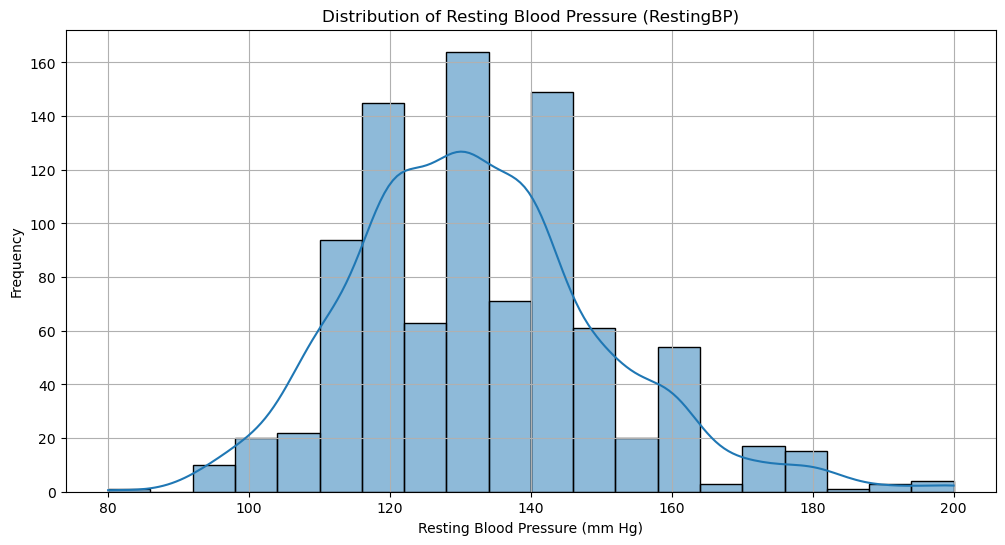

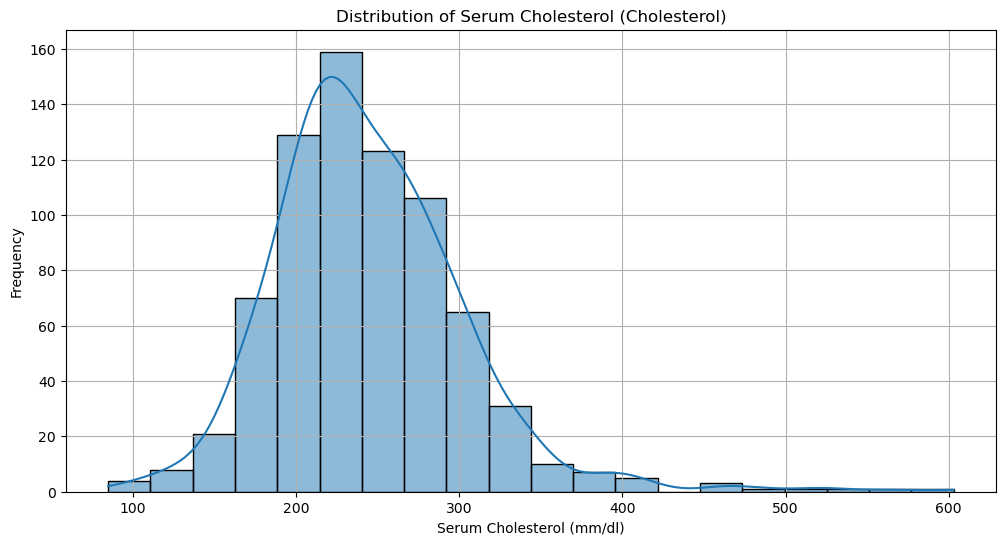

In [86]:
# Plotting RestingBP
plt.figure(figsize=(12, 6))
sns.histplot(data=df1, x='RestingBP', bins=20, kde=True)
plt.title('Distribution of Resting Blood Pressure (RestingBP)')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting Cholesterol
plt.figure(figsize=(12, 6))
sns.histplot(data=df1, x='Cholesterol', bins=20, kde=True)
plt.title('Distribution of Serum Cholesterol (Cholesterol)')
plt.xlabel('Serum Cholesterol (mm/dl)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [87]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,746.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,59.153524,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,207.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,275.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Removing the rows with RestingBP more than 180 and less than 90

In [88]:
df2 = df1[(df1['RestingBP'] >= 90) & (df1['RestingBP'] <= 180)]
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


### Removing the rows with cholesterol value more than 400

In [89]:
df3 = df2[df2["Cholesterol"]<= 400]

## Imputing the missing Values with KNN method of Imputation

In [90]:
df_imputed = df3.copy()
imputer = KNNImputer(n_neighbors=2)
df_imputed["Cholesterol"] = imputer.fit_transform(df_imputed[["Cholesterol"]])
df_imputed.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


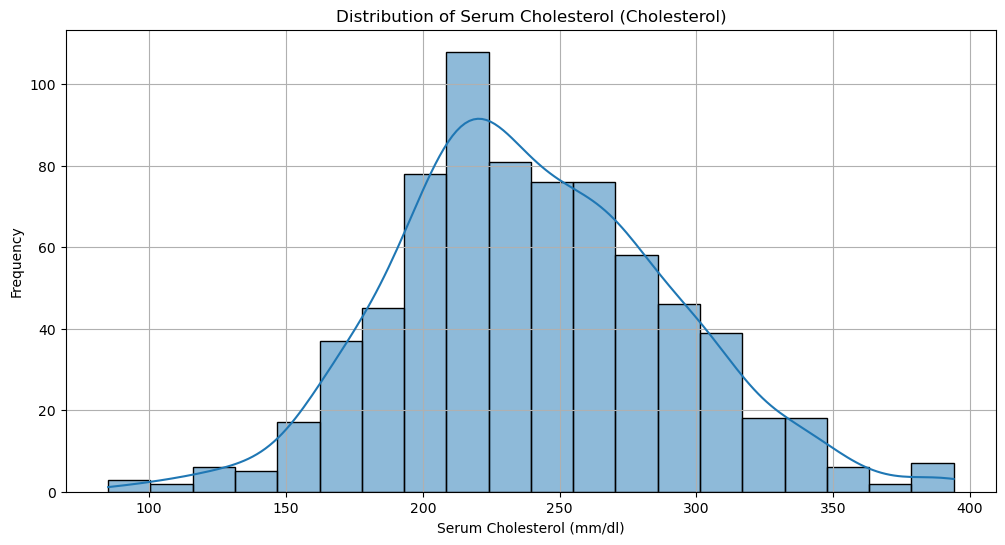

In [91]:
# Plotting Cholesterol
plt.figure(figsize=(12, 6))
sns.histplot(data=df_imputed, x='Cholesterol', bins=20, kde=True)
plt.title('Distribution of Serum Cholesterol (Cholesterol)')
plt.xlabel('Serum Cholesterol (mm/dl)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [92]:
#df_imputed.to_csv('imputed_dataset.csv', index=False)

In [93]:
df4 = df_imputed.copy()

### Frequency plotting of each categorical variable

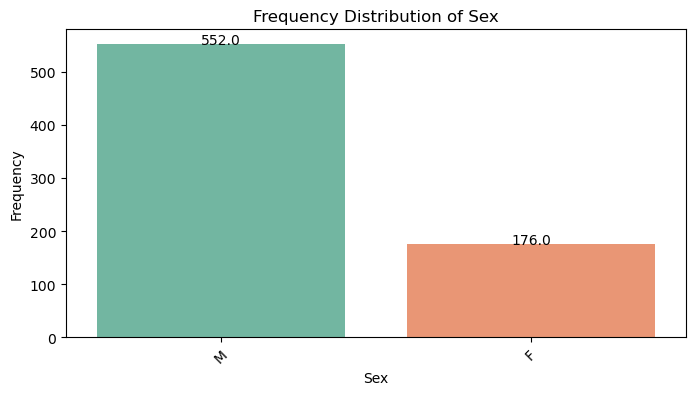

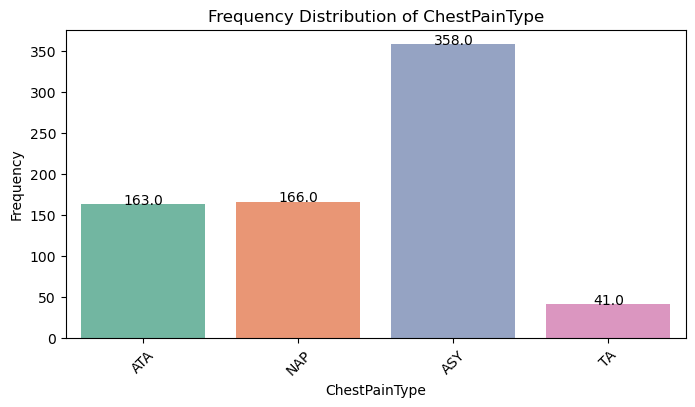

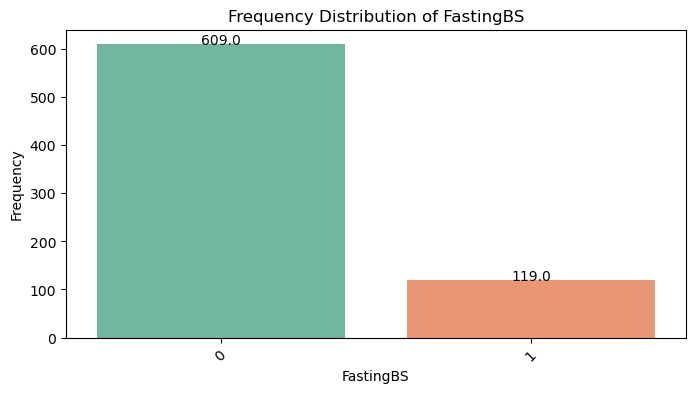

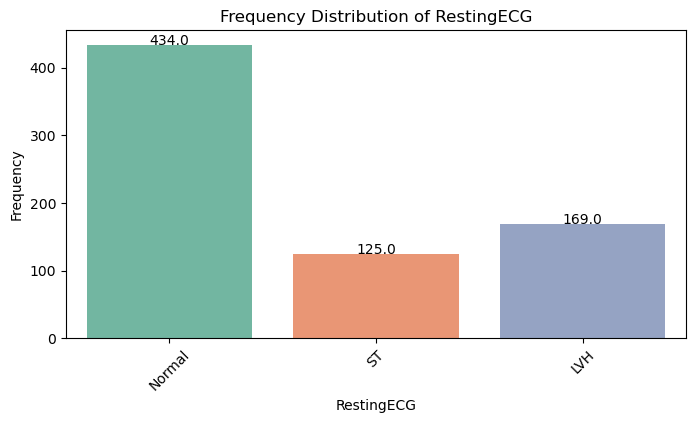

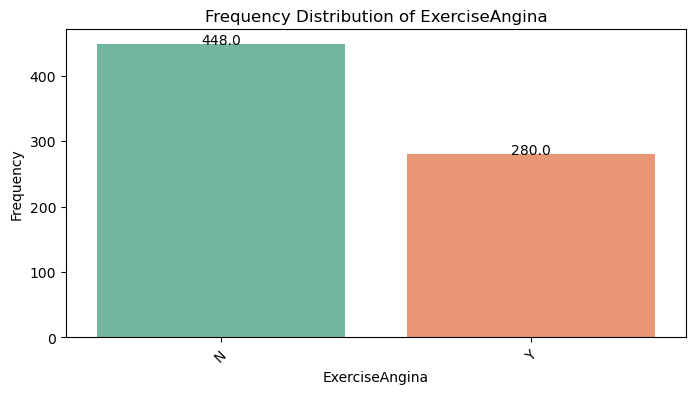

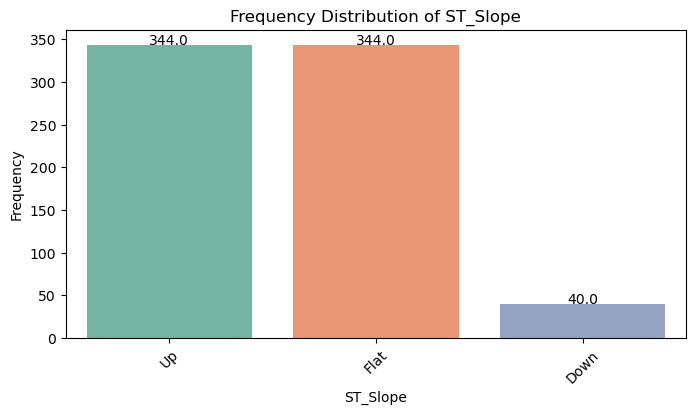

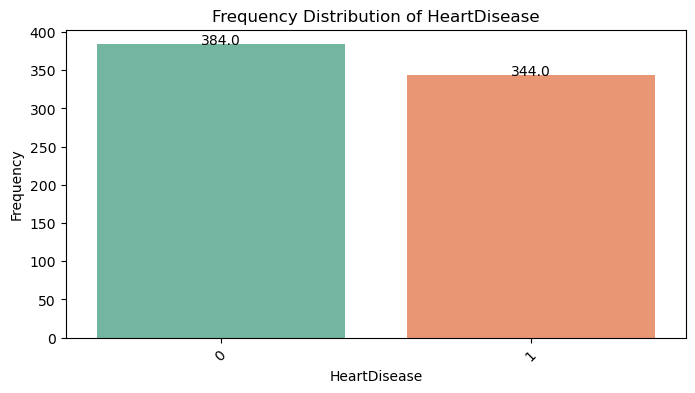

In [94]:
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

# Loop through each categorical column and create bar plots
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df4, x=column, palette='Set2')
    plt.title(f'Frequency Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    
    # Add frequency annotations on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
    plt.show()


## Plotting Bar Charts to compare Heart Failure in each category

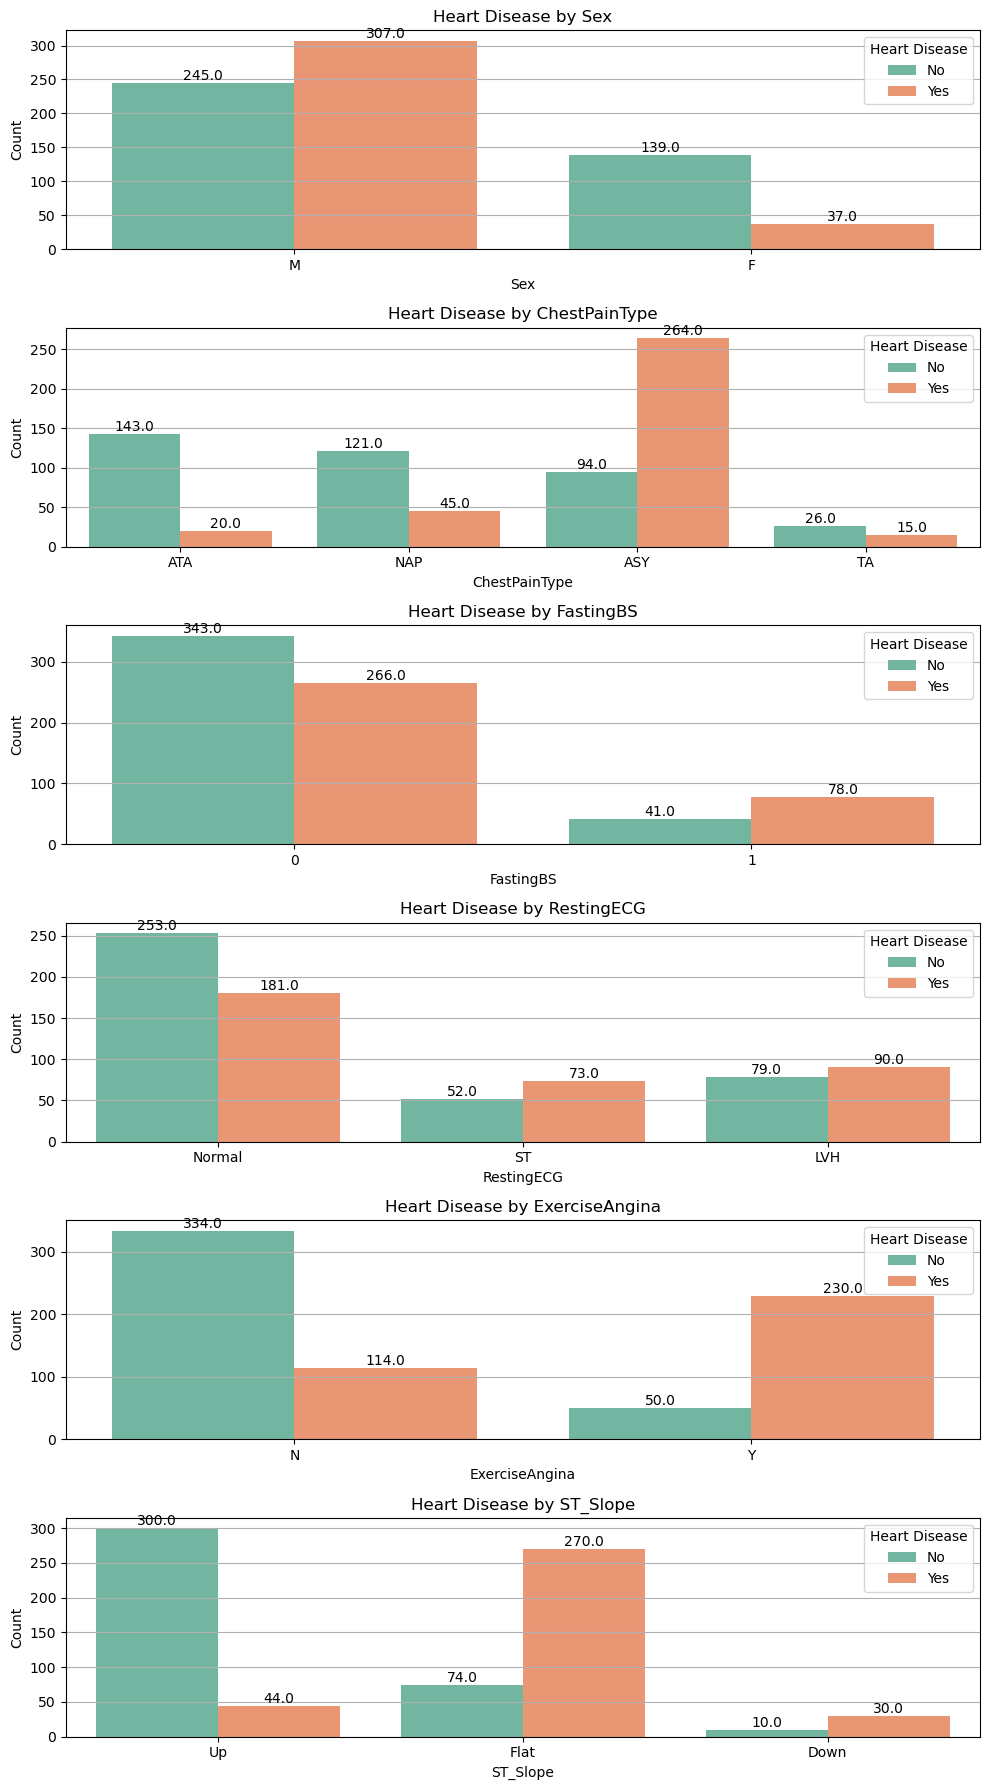

In [95]:
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 18))

for i, column in enumerate(categorical_columns):
    ax = sns.countplot(data=df4, x=column, hue='HeartDisease', ax=axes[i], palette='Set2')
    ax.set_title(f'Heart Disease by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.legend(title='Heart Disease', labels=['No', 'Yes'])
    ax.grid(axis='y')
    
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.tight_layout()

plt.show()


### Plotting frequency graph of continuous variable

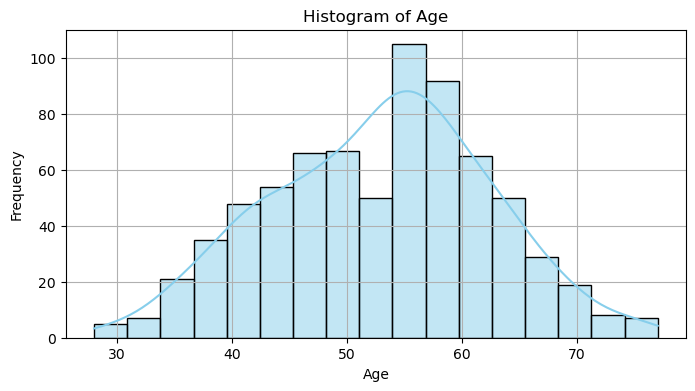

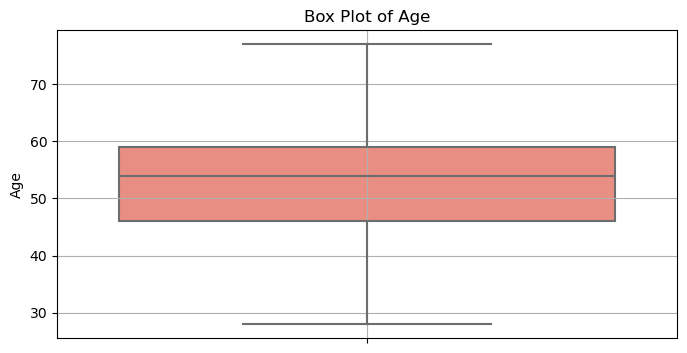

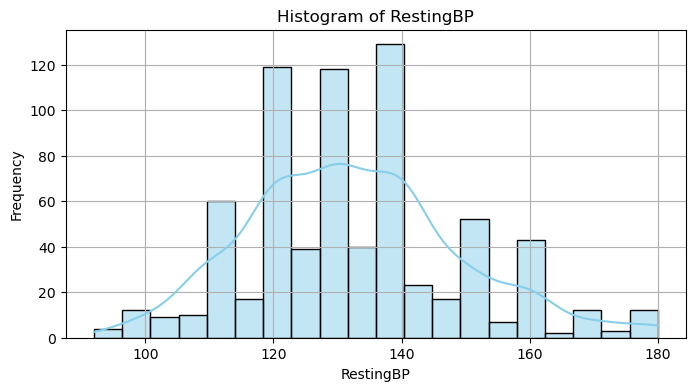

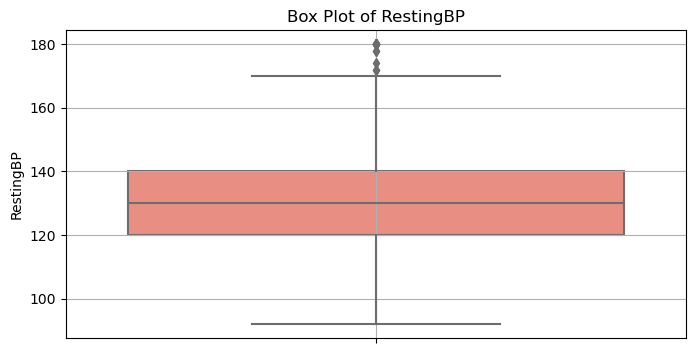

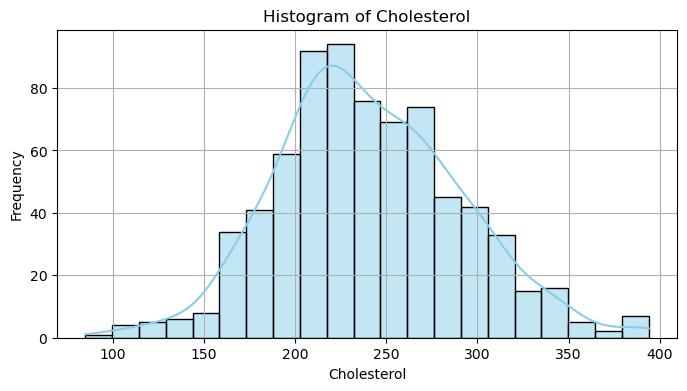

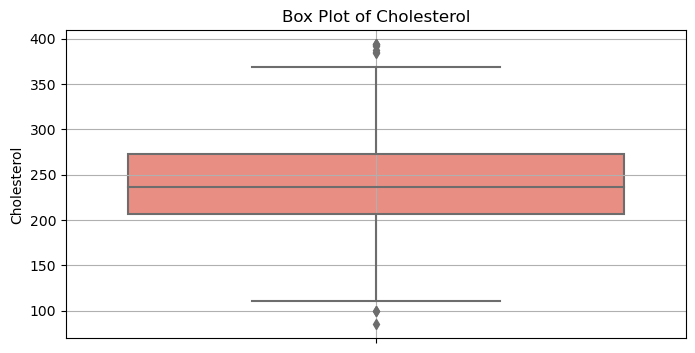

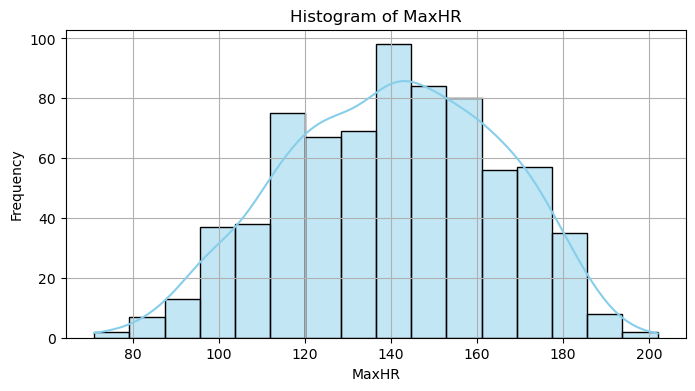

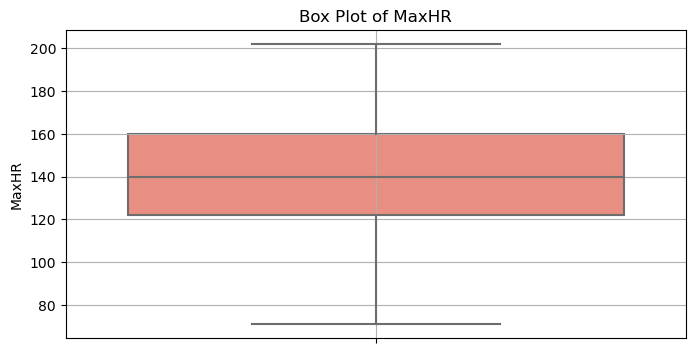

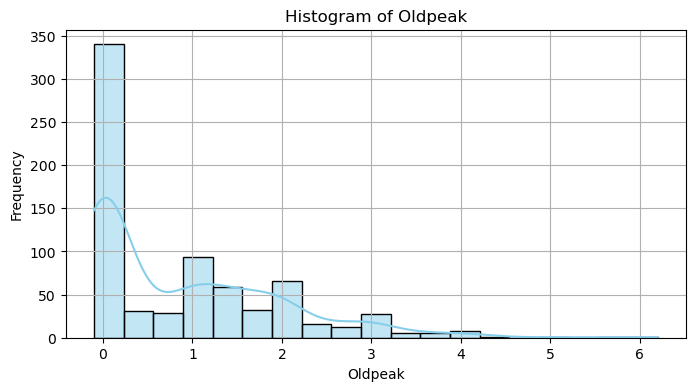

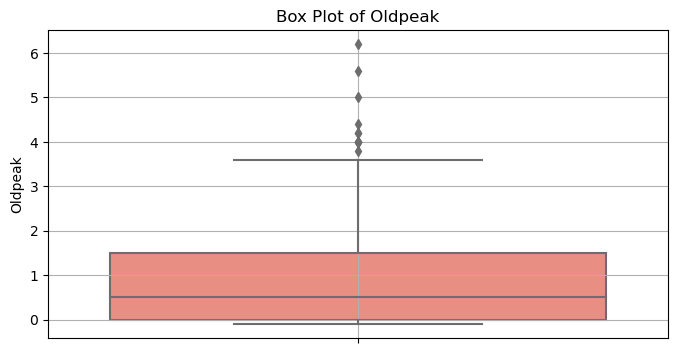

In [96]:
continuous_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for column in continuous_columns:
    plt.figure(figsize=(8, 4))
    
    sns.histplot(data=df4, x=column, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df4, y=column, color='salmon')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


In [97]:
df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
le_Sex = LabelEncoder()
le_ChestPainType = LabelEncoder()
le_RestingECG = LabelEncoder()
le_ExerciseAngina = LabelEncoder()
le_ST_Slope = LabelEncoder()

In [100]:
df4['Sex_le'] = le_Sex.fit_transform(df4['Sex'])
df4['ChestPainType_le'] = le_Sex.fit_transform(df4['ChestPainType'])
df4['RestingECG_le'] = le_Sex.fit_transform(df4['RestingECG'])
df4['ExerciseAngina_le'] = le_Sex.fit_transform(df4['ExerciseAngina'])
df4['ST_Slope_le'] = le_Sex.fit_transform(df4['ST_Slope'])
df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_le,ChestPainType_le,RestingECG_le,ExerciseAngina_le,ST_Slope_le
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,1,1,1,0,2
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,0,2,1,0,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,1,1,2,0,2
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,0,0,1,1,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,1,2,1,0,2


In [101]:
df5 = df4.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis = 'columns')
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_le,ChestPainType_le,RestingECG_le,ExerciseAngina_le,ST_Slope_le
0,40,140,289.0,0,172,0.0,0,1,1,1,0,2
1,49,160,180.0,0,156,1.0,1,0,2,1,0,1
2,37,130,283.0,0,98,0.0,0,1,1,2,0,2
3,48,138,214.0,0,108,1.5,1,0,0,1,1,1
4,54,150,195.0,0,122,0.0,0,1,2,1,0,2


In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
X = df5.drop('HeartDisease', axis = 'columns')
y = df5['HeartDisease']

In [104]:
for col in X:
    ss = StandardScaler()
    X[col] = ss.fit_transform(X[[col]])

In [105]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_le,ChestPainType_le,RestingECG_le,ExerciseAngina_le,ST_Slope_le
0,-1.355962,0.444110,0.960505,-0.442043,1.297814,-0.839160,0.564660,0.157341,0.095540,-0.790569,0.980138
1,-0.409317,1.646238,-1.196384,-0.442043,0.643854,0.098823,-1.770978,1.198656,0.095540,-0.790569,-0.702740
2,-1.671511,-0.156954,0.841777,-0.442043,-1.726751,-0.839160,0.564660,0.157341,1.676297,-0.790569,0.980138
3,-0.514500,0.323897,-0.523593,-0.442043,-1.318026,0.567815,-1.770978,-0.883973,0.095540,1.264911,-0.702740
4,0.116597,1.045174,-0.899564,-0.442043,-0.745811,-0.839160,0.564660,1.198656,0.095540,-0.790569,0.980138


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [108]:
from sklearn.linear_model import LogisticRegression

In [115]:
model_LR = LogisticRegression()

In [116]:
model_LR.fit(X_train,y_train)

LogisticRegression()

In [117]:
model_LR.score(X_test,y_test)

0.8356164383561644

In [118]:
from sklearn import tree

In [119]:
model_DT = tree.DecisionTreeClassifier()
model_DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [120]:
model_DT.score(X_test,y_test)

0.7945205479452054